In [32]:
# @article{madewithml,
#    author       = {Goku Mohandas},
#    title        = { Pandas - Made With ML },
#    howpublished = {\url{https://madewithml.com/}},
#    year         = {2023}
# }

In [33]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(seed=1234)

# Read from CSV to Pandas DataFrame
#url = "https://raw.githubusercontent.com/datasciencedojo/datasets/blob/master/titanic.csv"
df = pd.read_csv('titanic.csv')

# First few items
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Exploratory Data Analysis

In [34]:
import matplotlib.pyplot as plt

# Describe features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_2002/786456700.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


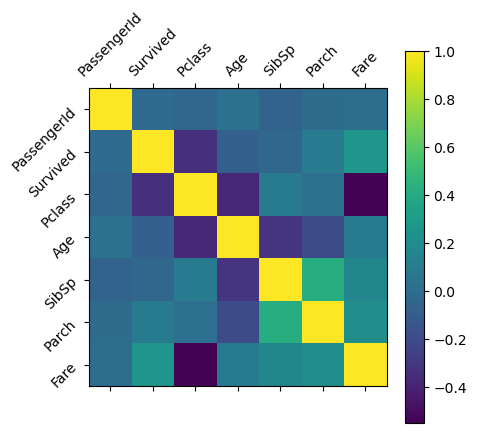

In [35]:
# Correlation matrix
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.yticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.colorbar()
plt.show()

<Axes: >

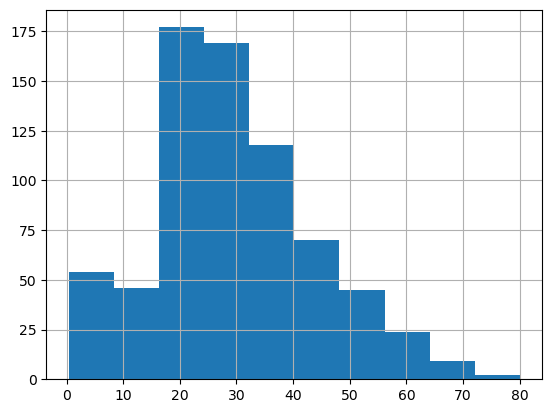

In [36]:
# Histograms
df["Age"].hist()

In [37]:
# Unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

#### Filtering

In [38]:
# Selecting data by feature
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [39]:
# Filtering
df[df["Sex"]=="female"].head() # only the female data appear

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Sorting

In [40]:
# Sorting
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


#### Grouping

In [41]:
# Grouping
survived_group = df.groupby("Survived")
survived_group.mean()

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_2002/3433218732.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_group.mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


#### Indexing

In [42]:
# Selecting row 0
df.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [43]:
# Selecting a specific value
df.iloc[0, 1]

0

#### Preprocessing

In [44]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [45]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [46]:
# Dropping multiple columns
df = df.drop(["Name", "Cabin", "Ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [47]:
# Map feature values
df["Eex"] = df["Sex"].map( {"female": 0, "male": 1} ).astype(int)
df["Embarked"] = df["Embarked"].dropna().map( {"S":0, "C":1, "Q":2} ).astype(int)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Eex
0,1,2,1,1,female,38.0,1,0,71.2833,1,0
1,3,4,1,1,female,35.0,1,0,53.1000,0,0
2,6,7,0,1,male,54.0,0,0,51.8625,0,1
3,10,11,1,3,female,4.0,1,1,16.7000,0,0
4,11,12,1,1,female,58.0,0,0,26.5500,0,0


#### Feature Engineering

In [48]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

In [49]:
df["family_size"] = df[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Eex,family_size
0,1,2,1,1,female,38.0,1,0,71.2833,1,0,1
1,3,4,1,1,female,35.0,1,0,53.1000,0,0,1
2,6,7,0,1,male,54.0,0,0,51.8625,0,1,0
3,10,11,1,3,female,4.0,1,1,16.7000,0,0,2
4,11,12,1,1,female,58.0,0,0,26.5500,0,0,0


In [50]:
# Reorganize headers
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "family_size", "Fare", "Embarked", "Survived"]]
df.head()

,Pclass,Sex,Age,SibSp,Parch,family_size,Fare,Embarked,Survived
0,1,female,38.0,1,0,1,71.2833,1,1
1,1,female,35.0,1,0,1,53.1000,0,1
2,1,male,54.0,0,0,0,51.8625,0,0
3,3,female,4.0,1,1,2,16.7000,0,1
4,1,female,58.0,0,0,0,26.5500,0,1
